In [0]:
!pip install --upgrade mabalgs

In [0]:
from mab import algs, ranked_algs, simulator
import matplotlib.pyplot as plt

In [0]:
def plot_results_proba(algorithm_name, array_result):
  row = 2
  column = 2

  fig, ax = plt.subplots(row, column, figsize=(20, 10))
  fig.suptitle('Performance of RBAM using {}'.format(algorithm_name))

  rank_value = 0

  for i in range(row):
    for j in range(column):
      ax[i, j].plot(range(array_result[1]), array_result[2][rank_value][:,0], label='0')
      ax[i, j].plot(range(array_result[1]), array_result[2][rank_value][:,1], label='1')
      ax[i, j].plot(range(array_result[1]), array_result[2][rank_value][:,2], label='2')
      ax[i, j].plot(range(array_result[1]), array_result[2][rank_value][:,3], label='3')
      ax[i, j].plot(range(array_result[1]), array_result[2][rank_value][:,4], label='4')
      ax[i, j].legend()
      ax[i, j].set_title('Rank {} Performance'.format(rank_value + 1))
      ax[i, j].set_xlabel('Time')
      ax[i, j].set_ylabel('Probability of select an arm')
      ax[i, j].set_ylim(0.0, 1.0)

      rank_value += 1

  fig.tight_layout()
  fig.subplots_adjust(top=0.88)


  plt.show()

def plot_result_rewards(result_ucb, result_ths, result_tuned):
  plt.title('Cumulative rewards of RBAM UCB1 vs Thompson Sampling vs UCB Tuned')
  plt.xlabel('Time')
  plt.ylabel('Rewards')
  plt.plot(range(result_ucb[1]), result_ucb[3], label='UCB1')
  plt.plot(range(result_ths[1]), result_ths[3], label='THS')
  plt.plot(range(result_tuned[1]), result_tuned[3], label='UCB Tuned')
  plt.legend()
  plt.grid(True)

  plt.show()


# RBA-M Algorithm Behavior

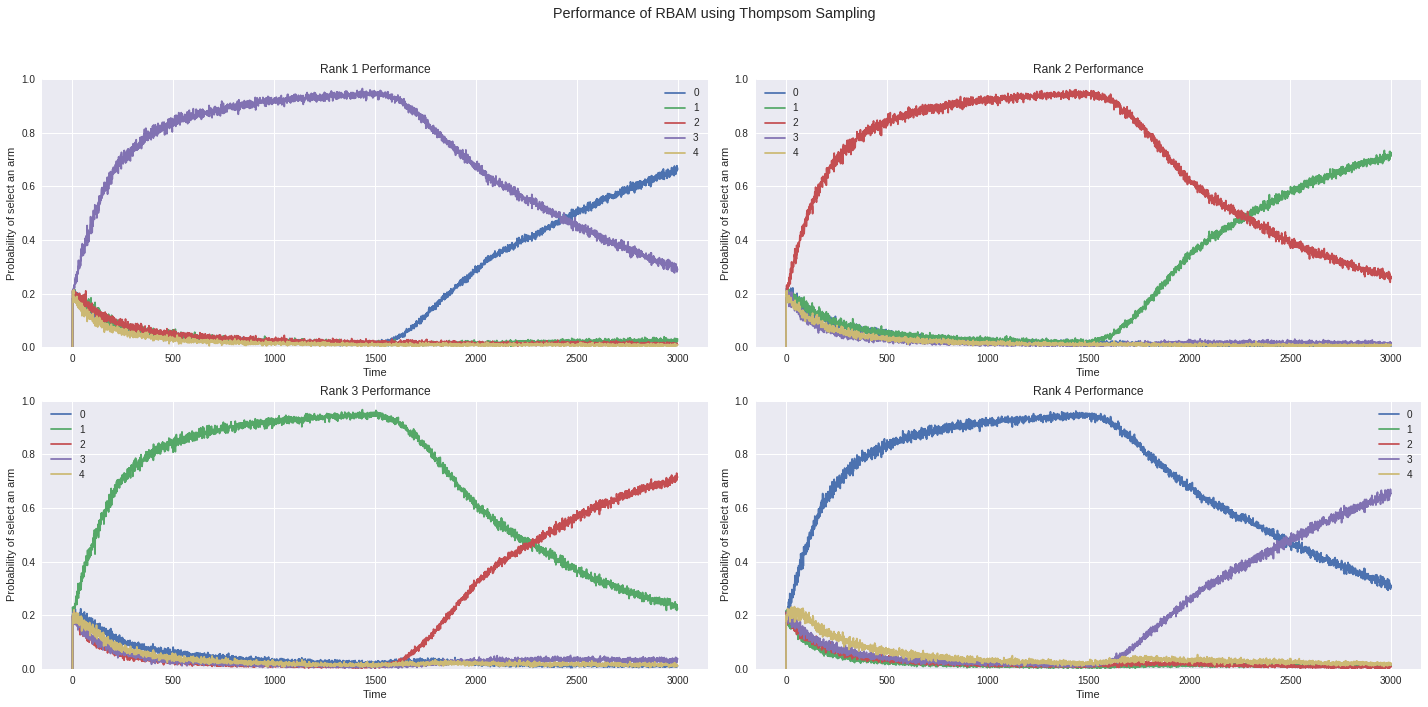

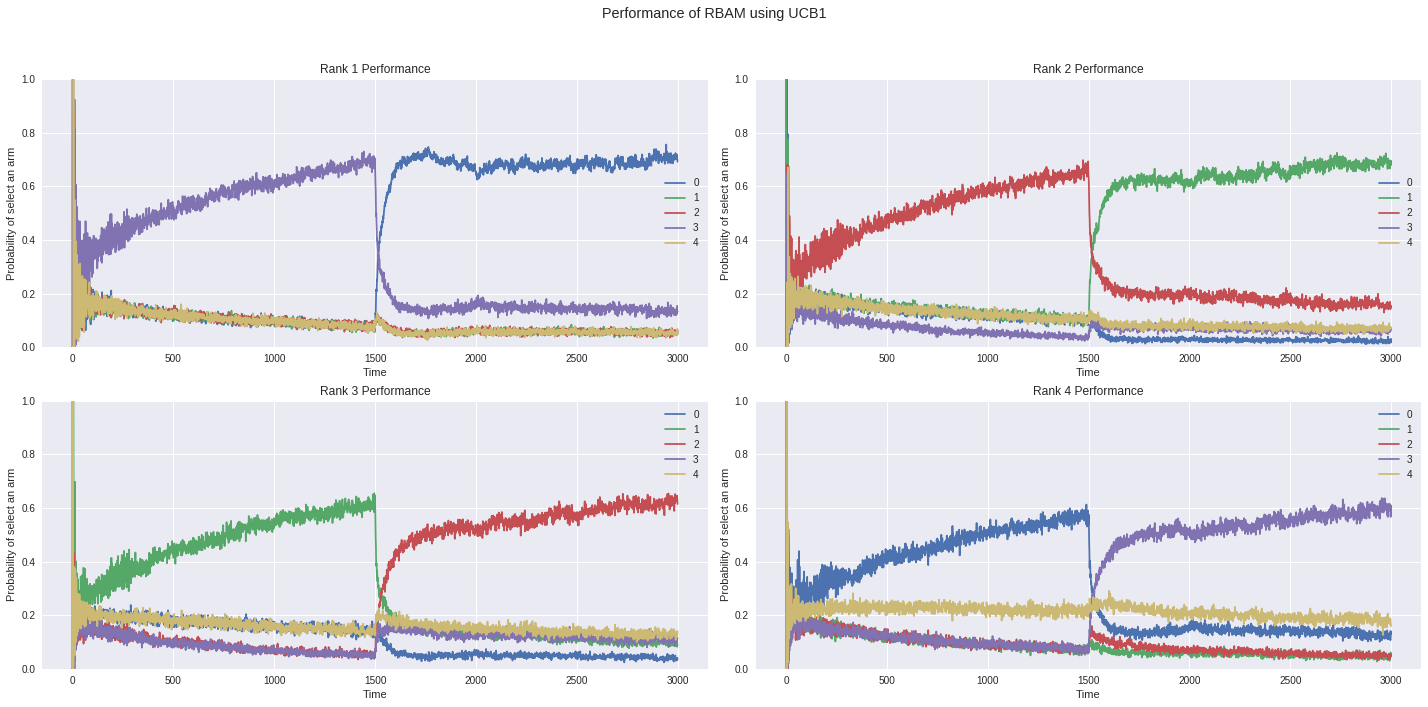

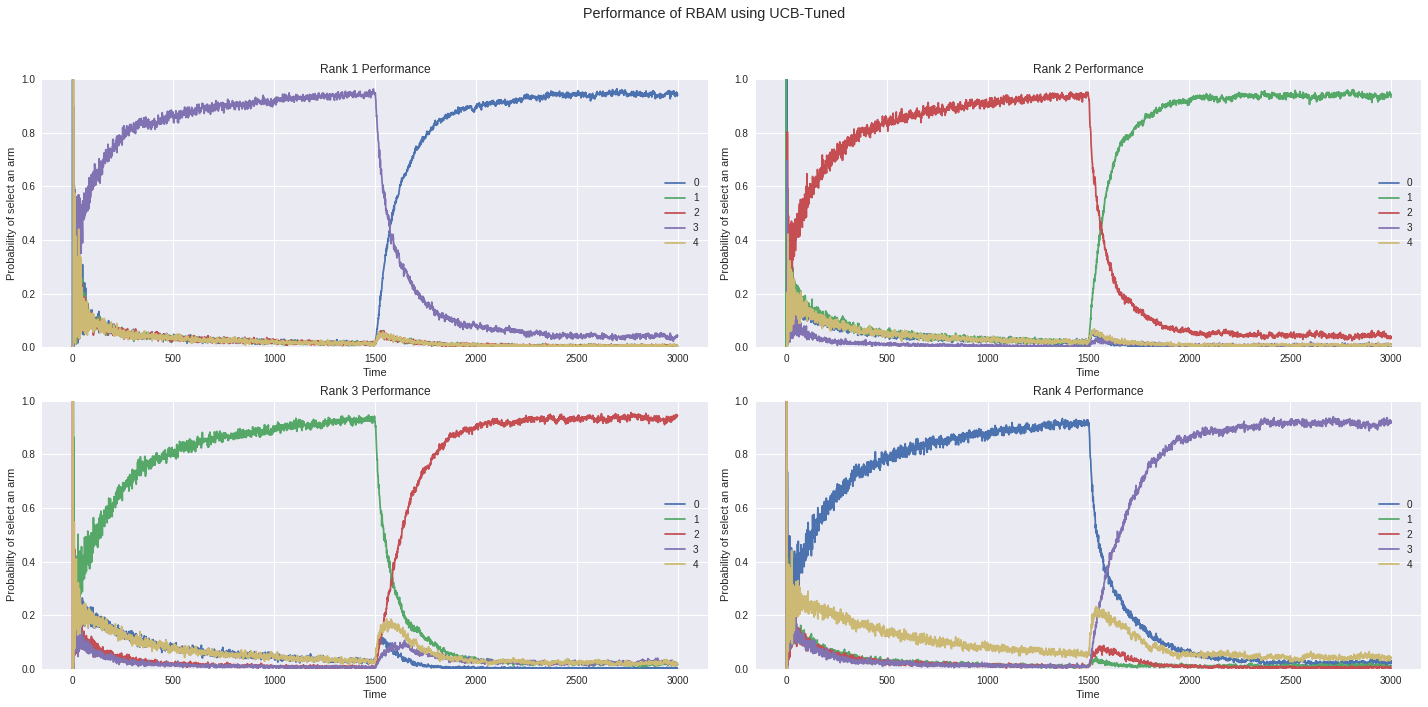

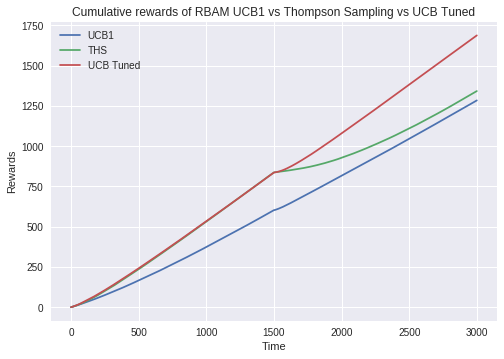

In [0]:
reward_probabilities = {0: [[0.1, 0.1, 0.1, 0.9, 0.1], 
                            [0.1, 0.1, 0.9, 0.1, 0.1], 
                            [0.1, 0.9, 0.1, 0.1, 0.1], 
                            [0.9, 0.1, 0.1, 0.1, 0.1], 
                            [0.25, 0.25, 0.25, 0.25]],
                        
                       1500: [[0.9, 0.1, 0.1, 0.1, 0.1], 
                             [0.1, 0.9, 0.1, 0.1, 0.1], 
                             [0.1, 0.1, 0.9, 0.1, 0.1], 
                             [0.1, 0.1, 0.1, 0.9, 0.1], 
                             [0.25, 0.25, 0.25, 0.25]]} #Rank weight.

number_of_pulls = 3000
number_of_simulation = 1000

mcs = simulator.RankedMonteCarloSimulator()
results_ths = mcs.run("rbam", algs.ThompsomSampling, reward_probabilities, number_of_simulation, number_of_pulls)
results_ucb1 = mcs.run("rbam", algs.UCB1, reward_probabilities, number_of_simulation, number_of_pulls)
results_ucbtuned = mcs.run("rbam", algs.UCBTuned, reward_probabilities, number_of_simulation, number_of_pulls)

plot_results_proba('Thompsom Sampling', results_ths)
plot_results_proba('UCB1', results_ucb1)
plot_results_proba('UCB-Tuned', results_ucbtuned)
plot_result_rewards(results_ucb1, results_ths, results_ucbtuned)

In [0]:
print('Cumulative Rewards for UCB1: {}'.format(results_ucb1[3][-1]))
print('Cumulative Rewards for UCB Tuned: {}'.format(results_ucbtuned[3][-1]))
print('Cumulative Rewards for THS: {}'.format(results_ths[3][-1]))

Cumulative Rewards for UCB1: 1283.8849999999693
Cumulative Rewards for UCB Tuned: 1687.4009999999248
Cumulative Rewards for THS: 1341.8469999999625
